In [1]:
import pandas as pd
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()
timeseries = pd.DataFrame(timeseries)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [12]:
timeseries.shape

(1320, 8)

In [3]:
import matplotlib as mpl
font = {"family":"Comic Sans MS"}
mpl.rc('font', **font)

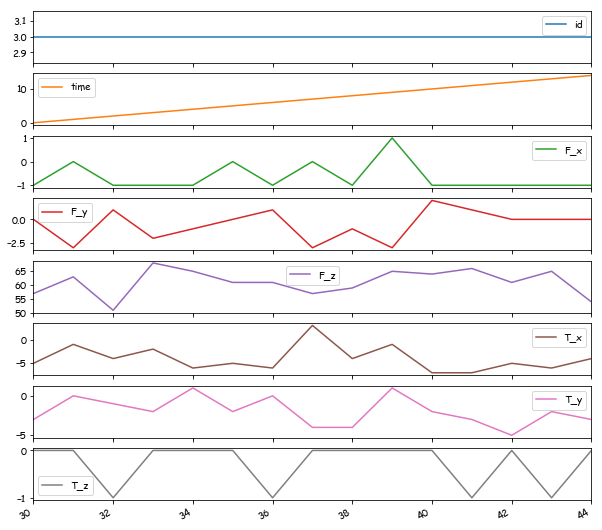

In [4]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

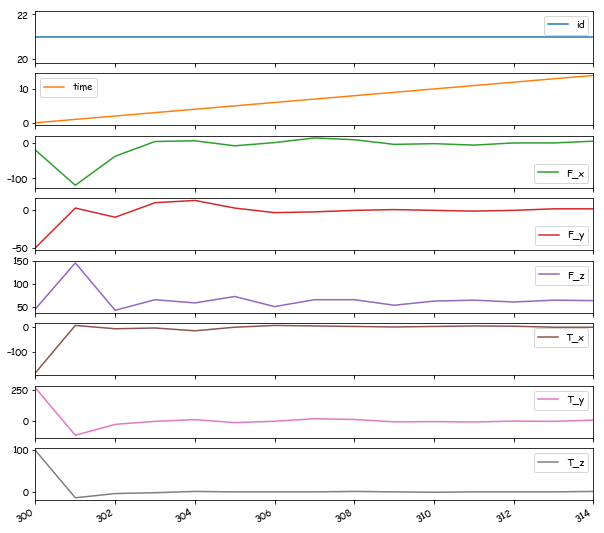

In [5]:
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [6]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 10/10 [00:15<00:00,  1.40s/it]


In [13]:
extracted_features.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-inf,T_z__value_count__value_0,T_z__value_count__value_1,T_z__value_count__value_inf,T_z__value_count__value_nan,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,3.035766e-17,0.105435,1.0,-1.0,-2.0,0.0,0.0,...,0.000000,-0.090909,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,0.0,...,0.000000,-0.181818,0.000000,0.0,8.0,1.0,0.0,0.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,0.0,...,-0.076923,-0.090909,-0.222222,0.0,9.0,2.0,0.0,0.0,0.382222,0.0


In [14]:
extracted_features.shape

(88, 4764)

In [8]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [9]:
features_filtered

variable,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,F_z__variance,...,T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,1.448889,...,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,18.782222,...,1.0,0.0,64.666667,-0.054604,0.000000,0.319311,-1.000000,0.222222,70.0,2.666667
3,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,21.315556,...,1.0,0.0,67.333333,-0.061050,0.000000,9.102780,-3.000000,0.250000,68.0,8.187500
4,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,14.693333,...,0.0,0.0,63.666667,-0.133794,1.555556,56.910262,-3.166667,1.360000,66.0,1.000000
5,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,23.440000,...,0.0,0.6,64.333333,-0.106108,0.000000,22.841805,-4.166667,1.040000,67.0,0.000000
6,39.0,7.0,88.0,2.080598,4.328889,2.001820,2.827440,225.0,3.047768,9.288889,...,0.0,0.0,63.333333,-0.089968,0.000000,0.663683,-5.666667,0.666667,64.0,0.000000
7,21.0,13.0,27.0,1.892676,3.582222,1.133819,12.822865,234.0,5.243409,27.493333,...,0.0,0.0,62.833333,-0.057605,0.000000,2.314288,-3.833333,0.693878,65.0,5.687500
8,26.0,9.0,24.0,2.445858,5.982222,2.090520,11.285890,213.0,4.364503,19.048889,...,0.0,1.0,67.000000,-0.100491,0.000000,1.114254,-5.666667,0.000000,69.0,0.000000
9,24.0,12.0,60.0,1.557776,2.426667,0.866097,4.619776,253.0,4.027682,16.222222,...,0.0,1.0,66.666667,-0.042633,0.000000,52.797640,-5.000000,0.187500,69.0,5.200000


In [10]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 10/10 [00:15<00:00,  1.55s/it]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [11]:
features_filtered_direct

variable,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,F_z__variance,...,T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,1.448889,...,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,18.782222,...,1.0,0.0,64.666667,-0.054604,0.000000,0.319311,-1.000000,0.222222,70.0,2.666667
3,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,21.315556,...,1.0,0.0,67.333333,-0.061050,0.000000,9.102780,-3.000000,0.250000,68.0,8.187500
4,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,14.693333,...,0.0,0.0,63.666667,-0.133794,1.555556,56.910262,-3.166667,1.360000,66.0,1.000000
5,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,23.440000,...,0.0,0.6,64.333333,-0.106108,0.000000,22.841805,-4.166667,1.040000,67.0,0.000000
6,39.0,7.0,88.0,2.080598,4.328889,2.001820,2.827440,225.0,3.047768,9.288889,...,0.0,0.0,63.333333,-0.089968,0.000000,0.663683,-5.666667,0.666667,64.0,0.000000
7,21.0,13.0,27.0,1.892676,3.582222,1.133819,12.822865,234.0,5.243409,27.493333,...,0.0,0.0,62.833333,-0.057605,0.000000,2.314288,-3.833333,0.693878,65.0,5.687500
8,26.0,9.0,24.0,2.445858,5.982222,2.090520,11.285890,213.0,4.364503,19.048889,...,0.0,1.0,67.000000,-0.100491,0.000000,1.114254,-5.666667,0.000000,69.0,0.000000
9,24.0,12.0,60.0,1.557776,2.426667,0.866097,4.619776,253.0,4.027682,16.222222,...,0.0,1.0,66.666667,-0.042633,0.000000,52.797640,-5.000000,0.187500,69.0,5.200000
